<a href="https://colab.research.google.com/github/Honggu12/Machine-Learning/blob/main/2_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- LinearRegression
- Ridge (*l*2 - MSE)
- Lasso (*l*1 - MAE)

In [ ]:
# 사이킷런 공부용 패키지
!pip install mglearn

     |████████████████████████████████| 542kB 5.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=a6fa5573daba825c8ec09adfa0c056fbc3b2310f5ce94f1c751351594cf4503b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60) # 60개의 회귀 샘플 뽑기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

선형 회귀 모델에서는 가중치, 편향, 값을 확인할 수 있다.

- 가중치(weight) - cofficient. coef_로 확인 가능
- 편향(offset, intercept) - intercept_로 확인 가능

In [ ]:
# 가중치 확인
lr.coef_

array([0.39390555])

In [ ]:
# 편향
lr.intercept_


-0.031804343026759746

점수(결정계수) 확인하기

In [ ]:
print("훈련 세트 점수 :{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 :{:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 :0.67
테스트 세트 점수 :0.66


과소적합인 상태

- 선형 회귀는 수학적 계산을 통해 가중치와 편향만을 이용하는 모델이다.
- 사용한 데이터 세트가 복잡도가 매우 낮다.(특성이 한개 밖에 없음!)

In [ ]:
# 보스턴 주택가격 데이터셋
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("훈련 세트 점수 :{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 :{:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 :0.95
테스트 세트 점수 :0.61


Ridge, Lasso 사용하기

- alpha 매개변수를 이용해서 가중치를 조절할 수 있다.
- alpha는 패널티 이다.
- alpha가 높아지면 가중치가 줄어든다.
- alpha가 낮아지면 가중치가 늘어난다.

특성에 제한이 걸리는 모델이다.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge().fit(X_train, y_train)
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print("ridge alpha 1.0일 때 훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("ridge alpha 1.0일 때 테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

ridge alpha 1.0일 때 훈련 세트 점수 : 0.89
ridge alpha 1.0일 때 테스트 세트 점수 : 0.75


In [ ]:
# alpha가 높아졌기 때문에 가중치가 낮아진다. -> 모델이 단순해 진다. (복잡도가 내려감)
# 과소적합이 될 가능성이 크다.

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [ ]:
# alpha가 낮아졌기 때문에 가중치가 높아진다. -> 모델이 복잡해 진다. (복잡도가 올라감)
# 점점 과대적합이 될 가능성이 크다.

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("ridge alpha 0.1일 때 훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("ridge alpha 0.1일 때 테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))



ridge alpha 0.1일 때 훈련 세트 점수 : 0.93
ridge alpha 0.1일 때 테스트 세트 점수 : 0.77


alpha값에 따른 가중치 시각화

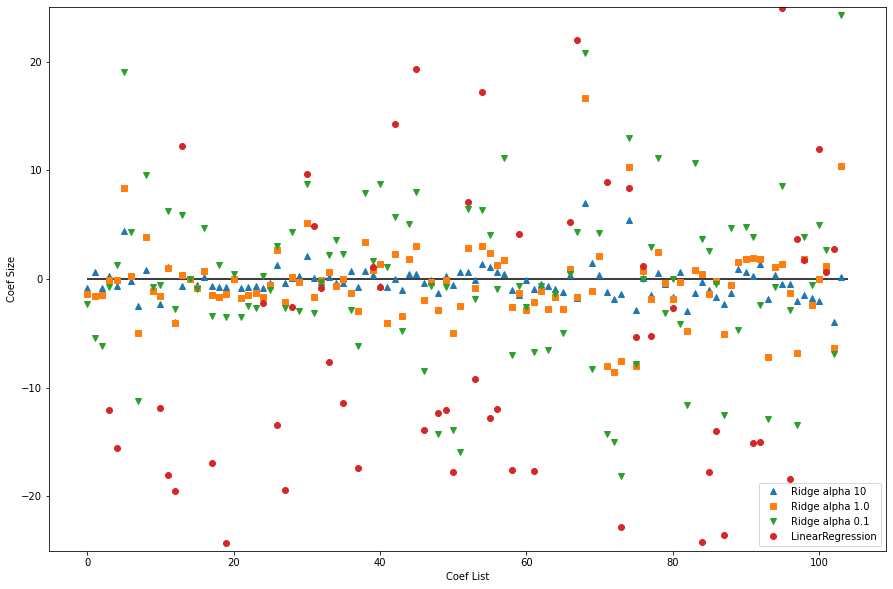

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.plot(ridge10.coef_, '^', label="Ridge alpha 10")
plt.plot(ridge.coef_, 's', label="Ridge alpha 1.0")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha 0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coef List")
plt.ylabel("Coef Size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [ ]:
ridge000001 = Ridge(alpha=0.000001).fit(X_train, y_train)
print("{:.2f}".format(ridge000001.score(X_train, y_train)))
print("{:.2f}".format(ridge000001.score(X_test, y_test)))

0.95
0.61


In [ ]:
lasso = Lasso().fit(X_train, y_train)
lasso
                

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
import numpy as np

def print_score(model, train_x, train_y, test_x, test_y):
  print("훈련 세트 점수 : {:.2f}".format(model.score(train_x, train_y)))
  print("테스트 세트 점수 : {:.2f}".format(model.score(test_x, test_y)))
  print("사용한 특성의 수 : {}".format(np.sum(model.coef_ != 0)))

In [ ]:
print_score(lasso, X_train, y_train, X_test, y_test)

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 수 : 4


In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print_score(lasso001, X_train, y_train, X_test, y_test)

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 수 : 33


In [ ]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print_score(lasso0001, X_train, y_train, X_test, y_test)

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 : 96


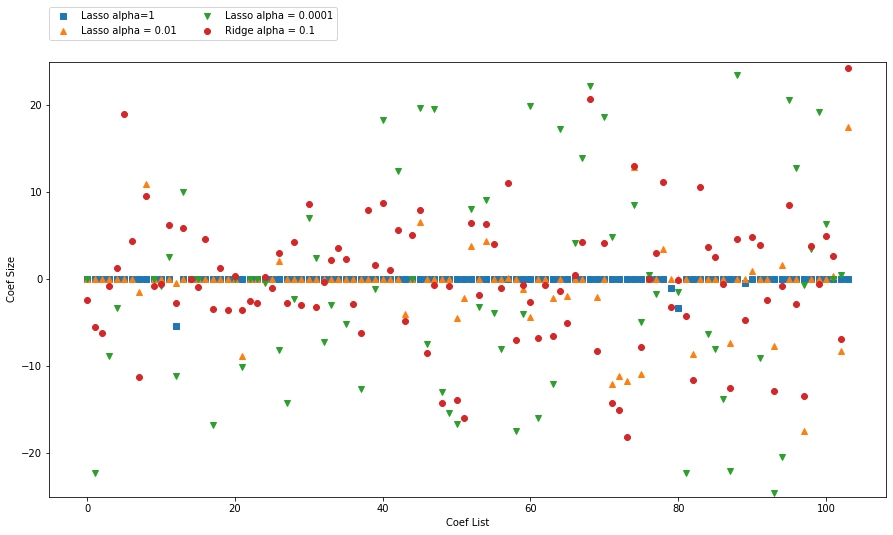

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coef List")
plt.ylabel("Coef Size")
plt.show()